<a href="https://colab.research.google.com/github/daniahmad92/Project_akhir-Medium/blob/main/Revisi_PROYEK_AKHIR_Image_Classification_Model_Deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Diri:**

Nama : Dadan Ahmad Dani

Email: email@dadanahmaddani.com


**Submission**

Belajar Pengembangan Machine Learning
Proyek Akhir : Image Classification Model Deployment

mampu mengembangkan model ML untuk klasifikasi gambar kemudian mengkonversi model tersebut ke dalam format berkas TF-Lite yang dapat di embed di Android dan iOS.

**Menyiapkan Library Tensorflow**

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


***Dataset***

In [ ]:
!wget --no-check-certificate \
        https://dadanahmaddani.com/dataset/flower.zip \
        -O /tmp/flower.zip

--2022-06-17 13:19:46--  https://dadanahmaddani.com/dataset/flower.zip
Resolving dadanahmaddani.com (dadanahmaddani.com)... 203.175.8.12
Connecting to dadanahmaddani.com (dadanahmaddani.com)|203.175.8.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 148097999 (141M) [application/zip]
Saving to: ‘/tmp/flower.zip’

/tmp/flower.zip     100%[===================>] 141.24M  16.3MB/s    in 10s     

2022-06-17 13:19:57 (14.2 MB/s) - ‘/tmp/flower.zip’ saved [148097999/148097999]



In [ ]:
import zipfile,os
local_zip = '/tmp/flower.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/flower'
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir, 'val')

ros_dir = os.path.join(base_dir,'roses')
sun_dir = os.path.join(base_dir, 'sunflowers')
tul_dir = os.path.join(base_dir, 'tulips')

In [ ]:
os.mkdir(train_dir)
os.mkdir(val_dir)

In [ ]:
train_ros = os.path.join(train_dir, 'roses')
train_sun = os.path.join(train_dir, 'sunflowers')
train_tul = os.path.join(train_dir, 'tulips')

In [ ]:
validation_ros = os.path.join(val_dir, 'roses')
validation_sun = os.path.join(val_dir, 'sunflowers')
validation_tul = os.path.join(val_dir, 'tulips')

In [ ]:
os.mkdir(train_ros)
os.mkdir(train_sun)
os.mkdir(train_tul)

In [ ]:
os.mkdir(validation_ros)
os.mkdir(validation_sun)
os.mkdir(validation_tul)

In [ ]:
from sklearn.model_selection import train_test_split

train_ros_dir, val_ros_dir = train_test_split(os.listdir(ros_dir), test_size = 0.20)
train_sun_dir, val_sun_dir = train_test_split(os.listdir(sun_dir), test_size = 0.20)
train_tul_dir, val_tul_dir = train_test_split(os.listdir(tul_dir), test_size = 0.20)

In [ ]:
import shutil

for file in train_ros_dir:
  shutil.copy(os.path.join(ros_dir, file), os.path.join(train_ros, file))

for file in train_sun_dir:
  shutil.copy(os.path.join(sun_dir,file), os.path.join(train_sun,file))

for file in train_tul_dir:
  shutil.copy(os.path.join(tul_dir,file), os.path.join(train_tul,file))

for file in val_ros_dir:
  shutil.copy(os.path.join(ros_dir, file), os.path.join(validation_ros,file))

for file in val_sun_dir:
  shutil.copy(os.path.join(sun_dir,file), os.path.join(validation_sun,file))
  
for file in val_tul_dir:
  shutil.copy(os.path.join(tul_dir,file), os.path.join(validation_tul,file))

**Preprocessing Data**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
    rescale = 1./225,
 
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 2120 images belonging to 3 classes.
Found 1041 images belonging to 3 classes.


**Membuat Model**

In [ ]:
model = tf.keras.models.Sequential([
 
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

**Melatih Model**

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):
      print("\nAkurasi telah mencapai >98%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
history = model.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator,
    callbacks=[callbacks]
)

Epoch 1/20
67/67 [==============================] - 114s 2s/step - loss: 0.3755 - accuracy: 0.8387 - val_loss: 0.2785 - val_accuracy: 0.8761
Epoch 2/20
67/67 [==============================] - 115s 2s/step - loss: 0.3539 - accuracy: 0.8406 - val_loss: 0.3210 - val_accuracy: 0.8530
Epoch 3/20
67/67 [==============================] - 114s 2s/step - loss: 0.3743 - accuracy: 0.8307 - val_loss: 0.4219 - val_accuracy: 0.8329
Epoch 4/20
67/67 [==============================] - 118s 2s/step - loss: 0.3488 - accuracy: 0.8514 - val_loss: 0.3056 - val_accuracy: 0.8665
Epoch 5/20
67/67 [==============================] - 115s 2s/step - loss: 0.2905 - accuracy: 0.8811 - val_loss: 0.2223 - val_accuracy: 0.9116
Epoch 6/20
67/67 [==============================] - 116s 2s/step - loss: 0.3094 - accuracy: 0.8722 - val_loss: 0.2061 - val_accuracy: 0.9174
Epoch 7/20
67/67 [==============================] - 116s 2s/step - loss: 0.2597 - accuracy: 0.8906 - val_loss: 0.2194 - val_accuracy: 0.9059
Epoch 8/20
67

**Evaluasi Tingkat Akurasi**

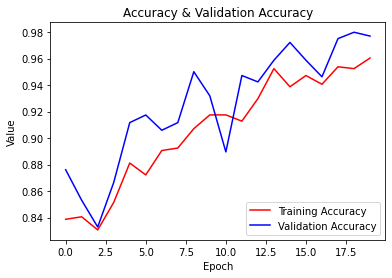

In [ ]:
import matplotlib.pyplot as plt

# plot accuracy train & validation
plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Accuracy & Validation Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

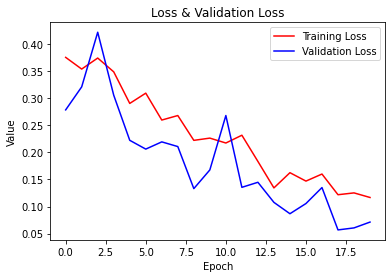

In [ ]:
# plot loss train & validation
plt.plot(history.history['loss'], 'r', label='Training Loss')
plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
plt.title('Loss & Validation Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

**Menyimpan model ke dalam format TF-Lite.**

In [ ]:
# Menyimpan model dalam format SavedModel
import pathlib
export_dir = 'folder_output/'
tf.saved_model.save(model, export_dir)
 
# Convert SavedModel menjadi vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
 
tflite_model_file = pathlib.Path('final.tflite')
tflite_model_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: folder_output/assets


76144520